### import necessary libraries

In [1]:
import cv2    # pip install opencv-python

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image   # pip install Pillow

import numpy as np

### read image in 2D array

In [2]:
Input_image = cv2.imread('Hi.tif', cv2.IMREAD_GRAYSCALE)

### function for convert 2D GRAYSCALE image to 3D array

In [3]:
Gray2RGB = lambda img : np.stack((img,)*3, axis=-1)

### function for show image 

In [4]:
def ShowImage(img, title="no title", subplot=111):
    if type(subplot)!=tuple :
        plt.subplot(subplot)
    else :
        plt.subplot(*subplot)
    plt.imshow( img, cmap='gray', vmin=0, vmax=255 )
    plt.title( title, fontweight ="bold")

# Q1

<div align='right' dir="rtl" style='font-family:"B Nazanin"; font-size:20px; line-height: 200%;'><p>

تابع horizontal_flip_function که تصویر ورودی را بصورت افقی میچرخاند و بر میگرداند

تابع transpose_function که مربوط به transpose کردن تصویر و تابع crop_function مربوط به برش بخش خاصی از تصویر و تابع roll_function جهت شیفت به بالا و پایین و چپ و راست بسته به پارامتر های ورودی

اگر مقدار horizontal برابر یک باشد شیفت در جهت افقی وگرنه در جهت عمودی اعمال میشود و پارمتر pixel نمایانگر مقدار شیفت خواهد بود  
برای نمونه  
horizontal=1, pixel=+2   right shift  
horizontal=1, pixel=-2   left shift  
horizontal=0, pixel=+2   down shift  
horizontal=0, pixel=-2   up shift  
بخش شیفت قطری هم حاصل ترکیب همین توابع خواهد بود.    
    
</p></div>

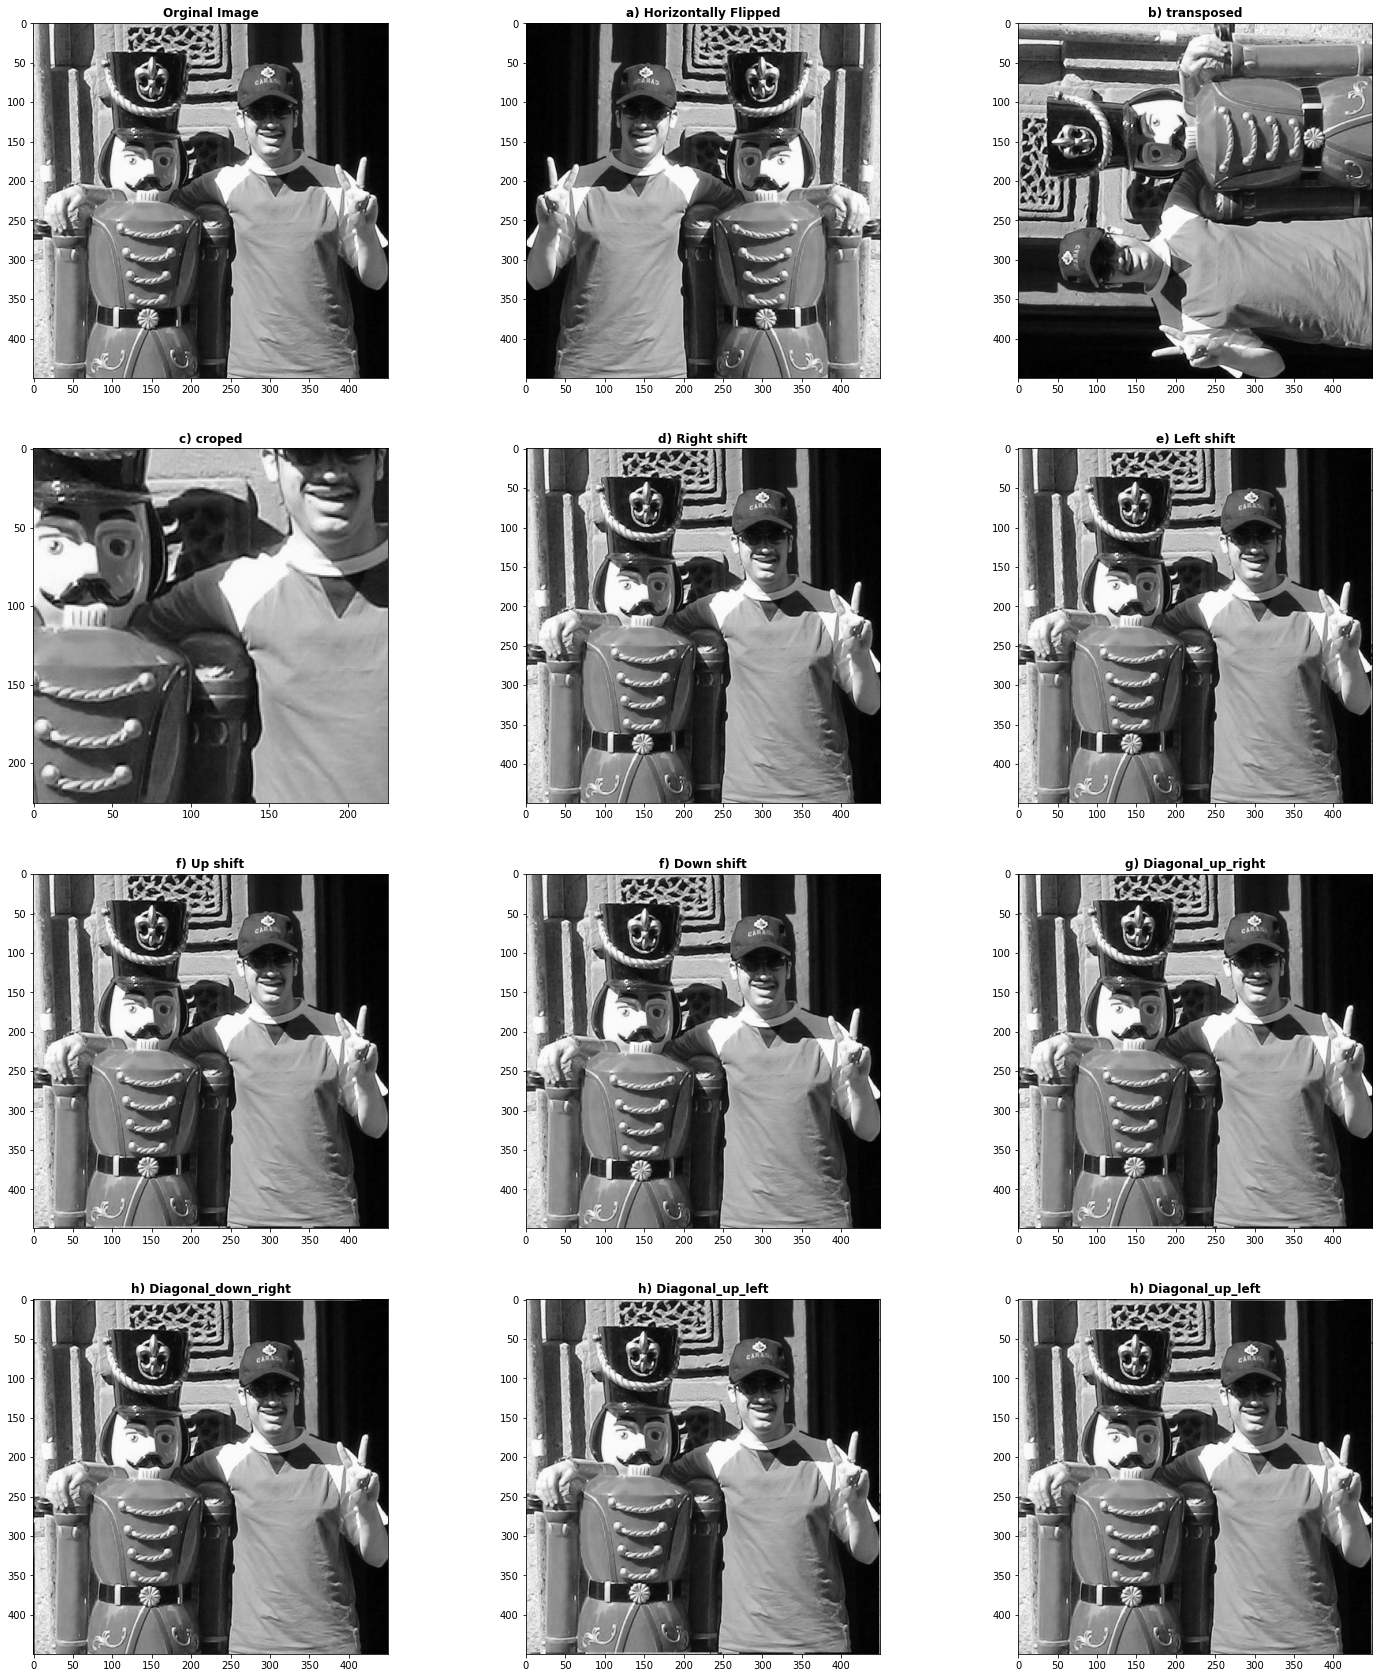

In [5]:
plt.figure(figsize=(25,30))

def horizontal_flip_function(Input_image):
    height, width = Input_image.shape
    res = np.zeros( (height, width) , dtype = Input_image.dtype)
    
    for row in range(height):
        for col in range(width):
            res[row][col] = Input_image[row][width-col-1]   
    return res
    #return cv2.flip(Input_image, 1)

def transpose_function(Input_image):
    height, width = Input_image.shape
    res = np.zeros( (width, height) , dtype = Input_image.dtype)
    
    for col in range(width):
        res[col] = Input_image[:,col]
    return res
    #return cv2.transpose(Input_image)
    #return np.transpose(Input_image)
    
def crop_function(Input_image):
    height, width = Input_image.shape
    h25p = int(height*0.25)
    w25p = int(width*0.25)
    return Input_image[h25p:height-h25p, w25p:width-w25p]

# https://stackoverflow.com/questions/30399534
def roll_function(Input_image, pixel=2, horizontal=1):
    if not pixel :
        return Input_image
    
    result = np.empty_like(Input_image)
    if horizontal:
        result[:, :pixel] = Input_image[:, -pixel:]
        result[:, pixel:] = Input_image[:, :-pixel]
    else:
        result[:pixel, :] = Input_image[-pixel:, :]
        result[pixel:, :] = Input_image[:-pixel, :]
    return result
    #return np.roll(Input_image, pixel, axis = horizontal) 
    #   https://github.com/numpy/numpy/blob/v1.21.0/numpy/core/numeric.py#L1140-L1238

ShowImage(Input_image, 'Orginal Image', 431)

horizontal_flip = horizontal_flip_function(Input_image)
ShowImage( horizontal_flip, 'a) Horizontally Flipped', 432)

transposed = transpose_function(Input_image)
ShowImage( transposed, 'b) transposed', 433)

ShowImage( crop_function(Input_image), 'c) croped', 434)

Right_shift = roll_function(Input_image, +2, 1)
Left_shift  = roll_function(Input_image, -2, 1)
Up_shift    = roll_function(Input_image, -2, 0)
Down_shift  = roll_function(Input_image, +2, 0)
ShowImage( Right_shift, 'd) Right shift', 435)
ShowImage( Left_shift, 'e) Left shift', 436)
ShowImage( Up_shift, 'f) Up shift', 437)
ShowImage( Down_shift, 'f) Down shift', 438)


Diagonal_up_right = roll_function(roll_function(Input_image, +2, 1), -2, 0)
Diagonal_down_right = roll_function(roll_function(Input_image, +2, 1), +2, 0)
Diagonal_up_left = roll_function(roll_function(Input_image, -2, 1), -2, 0)
Diagonal_down_left = roll_function(roll_function(Input_image, -2, 1), +2, 0)
ShowImage( Diagonal_up_right, 'g) Diagonal_up_right', 439)
ShowImage( Diagonal_down_right, 'h) Diagonal_down_right', (4, 3, 10) )
ShowImage( Diagonal_up_left, 'h) Diagonal_up_left', (4, 3, 11))
ShowImage( Diagonal_down_left, 'h) Diagonal_up_left', (4, 3, 12))

plt.show()

# Q2

### calculating the Mean Squared Error between two image

In [6]:
# https://stackoverflow.com/questions/16774849
def HW1_MSE(img1, img2):
    assert img1.shape==img2.shape, 'images should equal size'
    return np.square(np.subtract(img1.astype(int), img2.astype(int))).mean(axis=None)

# Q3

## a)

<div align='right' dir="rtl" style='font-family:"B Nazanin"; font-size:20px; line-height: 200%;'><p>

تابعی جهت کاهش روشنایی تصویر نوشته شده است و MSE عکس حاصل بعد کاهش 20 واحد روشنایی برابر   
MSE  = 359.4355851851852  
هستش.انتظار ما در بیشینه ترین حالت ممکن برابر 400 هستش ولی ظاهرا یک سری پیکسل ها مقادیری کمتر از 20 داشتند که MSE حاصل کمتر از 400 شده است.


</p></div>

In [7]:
# https://stackoverflow.com/questions/32609098
def decrease_brightness(Input_image, value=20):
    assert value > 0, 'Only positive numbers are allowed'
    res = Input_image.copy()
    res[res <= value] = 0
    res[res >  value] -= value
    return res

MSE  = 359.4355851851852


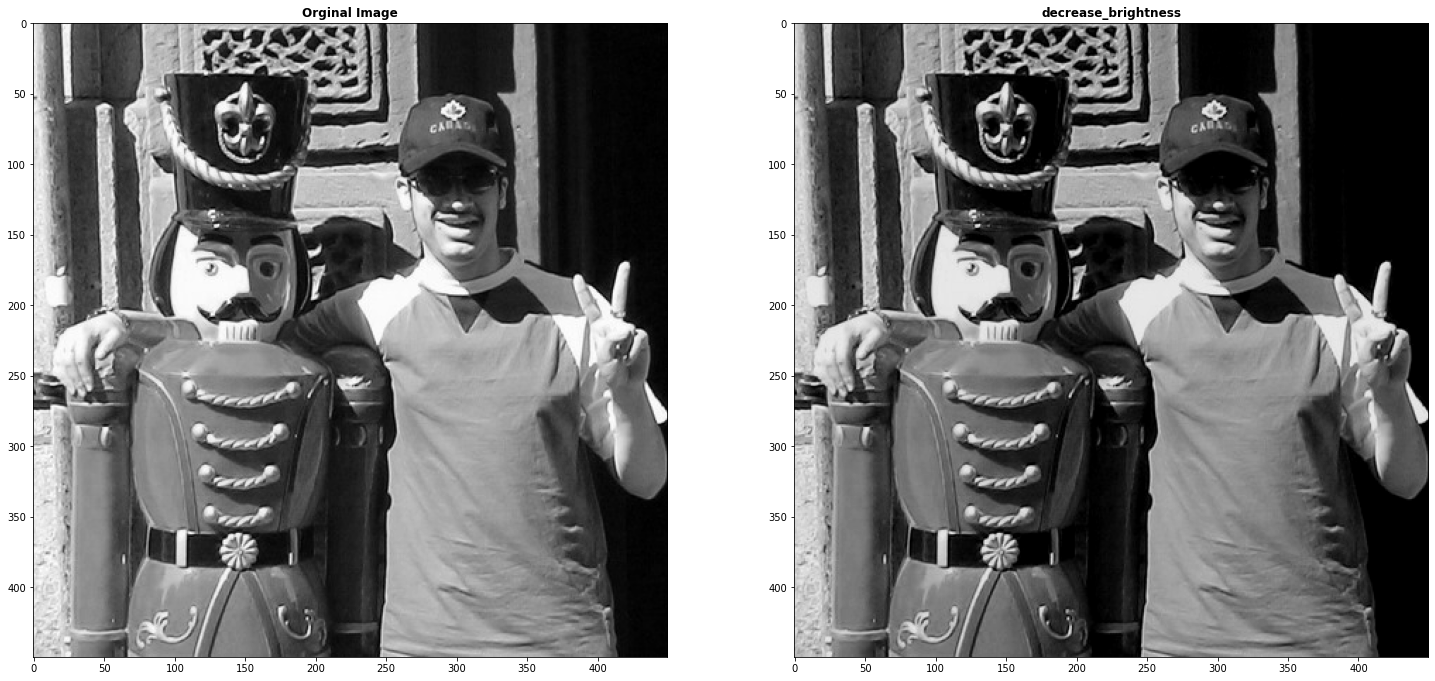

In [8]:
plt.figure(figsize=(25,25))

ShowImage(Input_image, 'Orginal Image', 121)

img2 = decrease_brightness(Input_image, 20)
ShowImage( img2 , 'decrease_brightness', 122)

print(f"MSE  = { HW1_MSE(Input_image, img2) }")

plt.show()

## b)

MSE  = 304.7030814814815


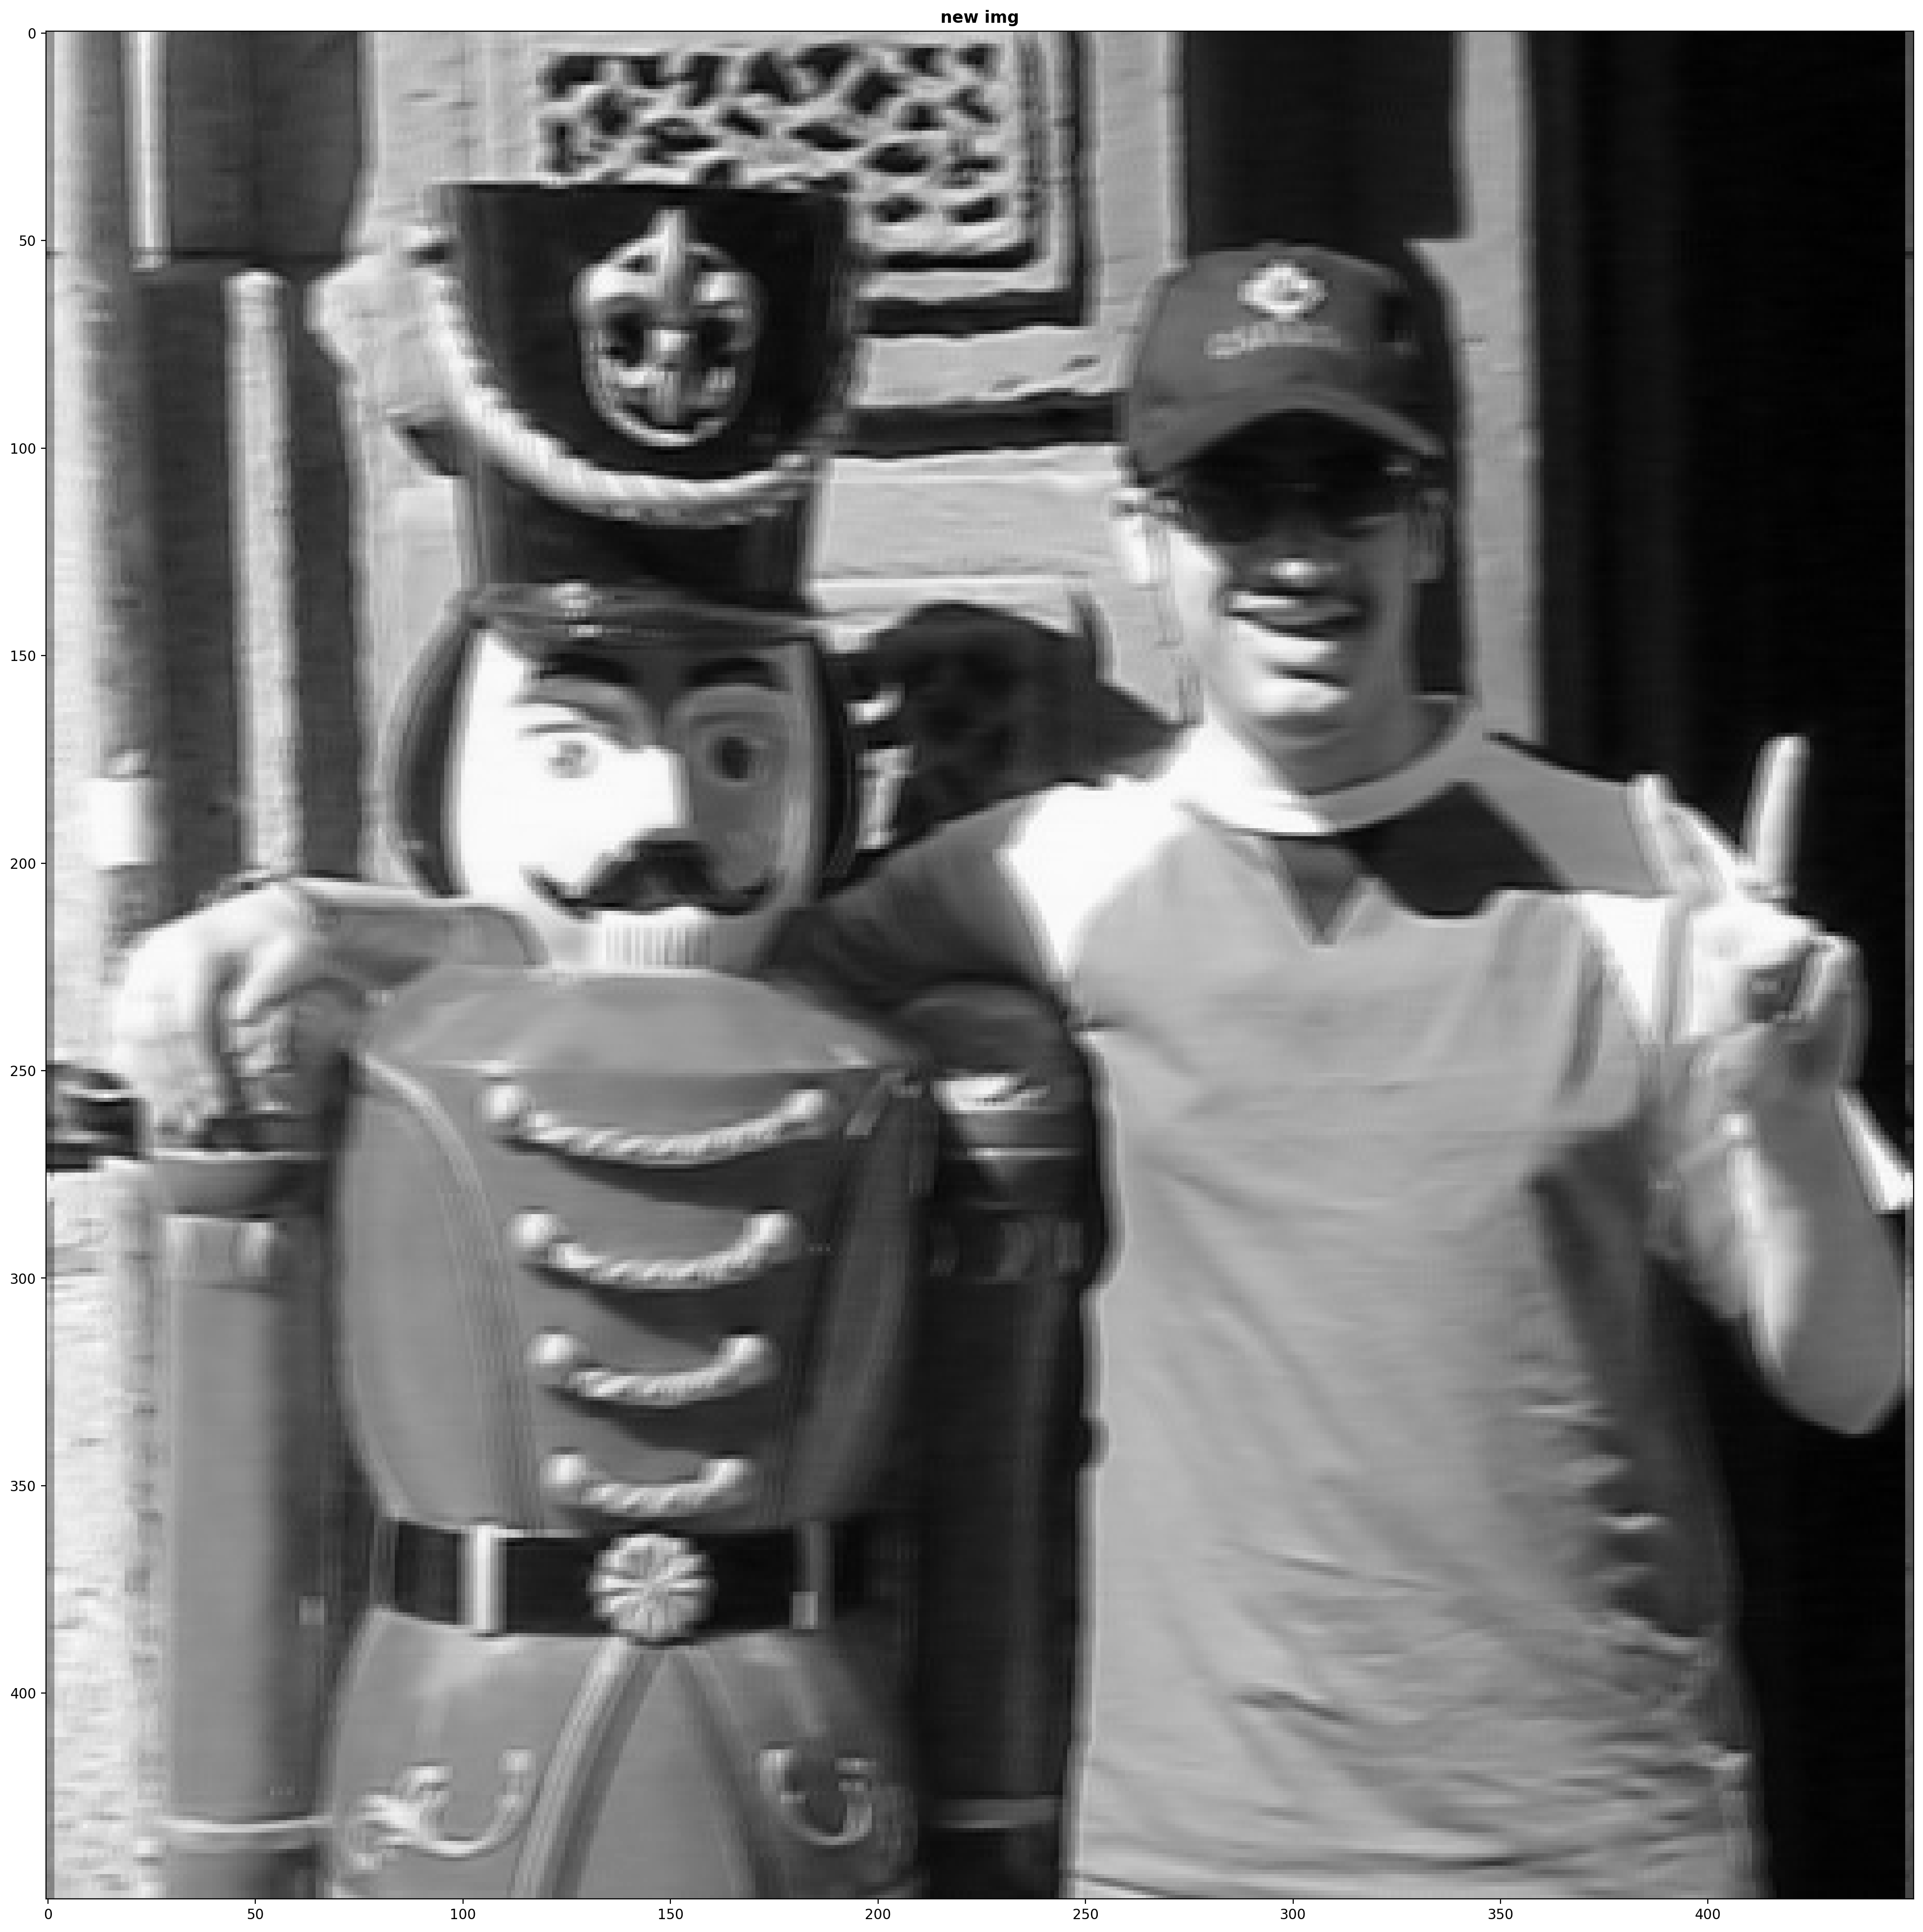

In [9]:
plt.figure(figsize=(25,25), dpi=200)

new_img = np.mean( np.array([ Input_image, Right_shift, Left_shift ]), axis=0).astype(np.uint8)

ShowImage( new_img , 'new img')

print(f"MSE  = { HW1_MSE(Input_image, new_img) }")

plt.show()

# Q4

<div align='right' dir="rtl" style='font-family:"B Nazanin"; font-size:20px; line-height: 200%;'><p>

همانطور که از نتایج پیداست روش bicubic بهترین روش، سپس bilinear  دقت بیشتری داشت برای حفظ و بازیابی تصویر پس از کوچک شدن و در اخر روش nearest  دارای بیشترین میزان خطا MSE هستش.

</p></div>

In [10]:
def imresize(Input_image, dim , interpolation=cv2.INTER_LINEAR):
    return cv2.resize(Input_image, dim, interpolation=interpolation)

nearest MSE  = 592.2657283950617
bilinear MSE = 63.0824987654321
bicubic MSE  = 18.399185185185186


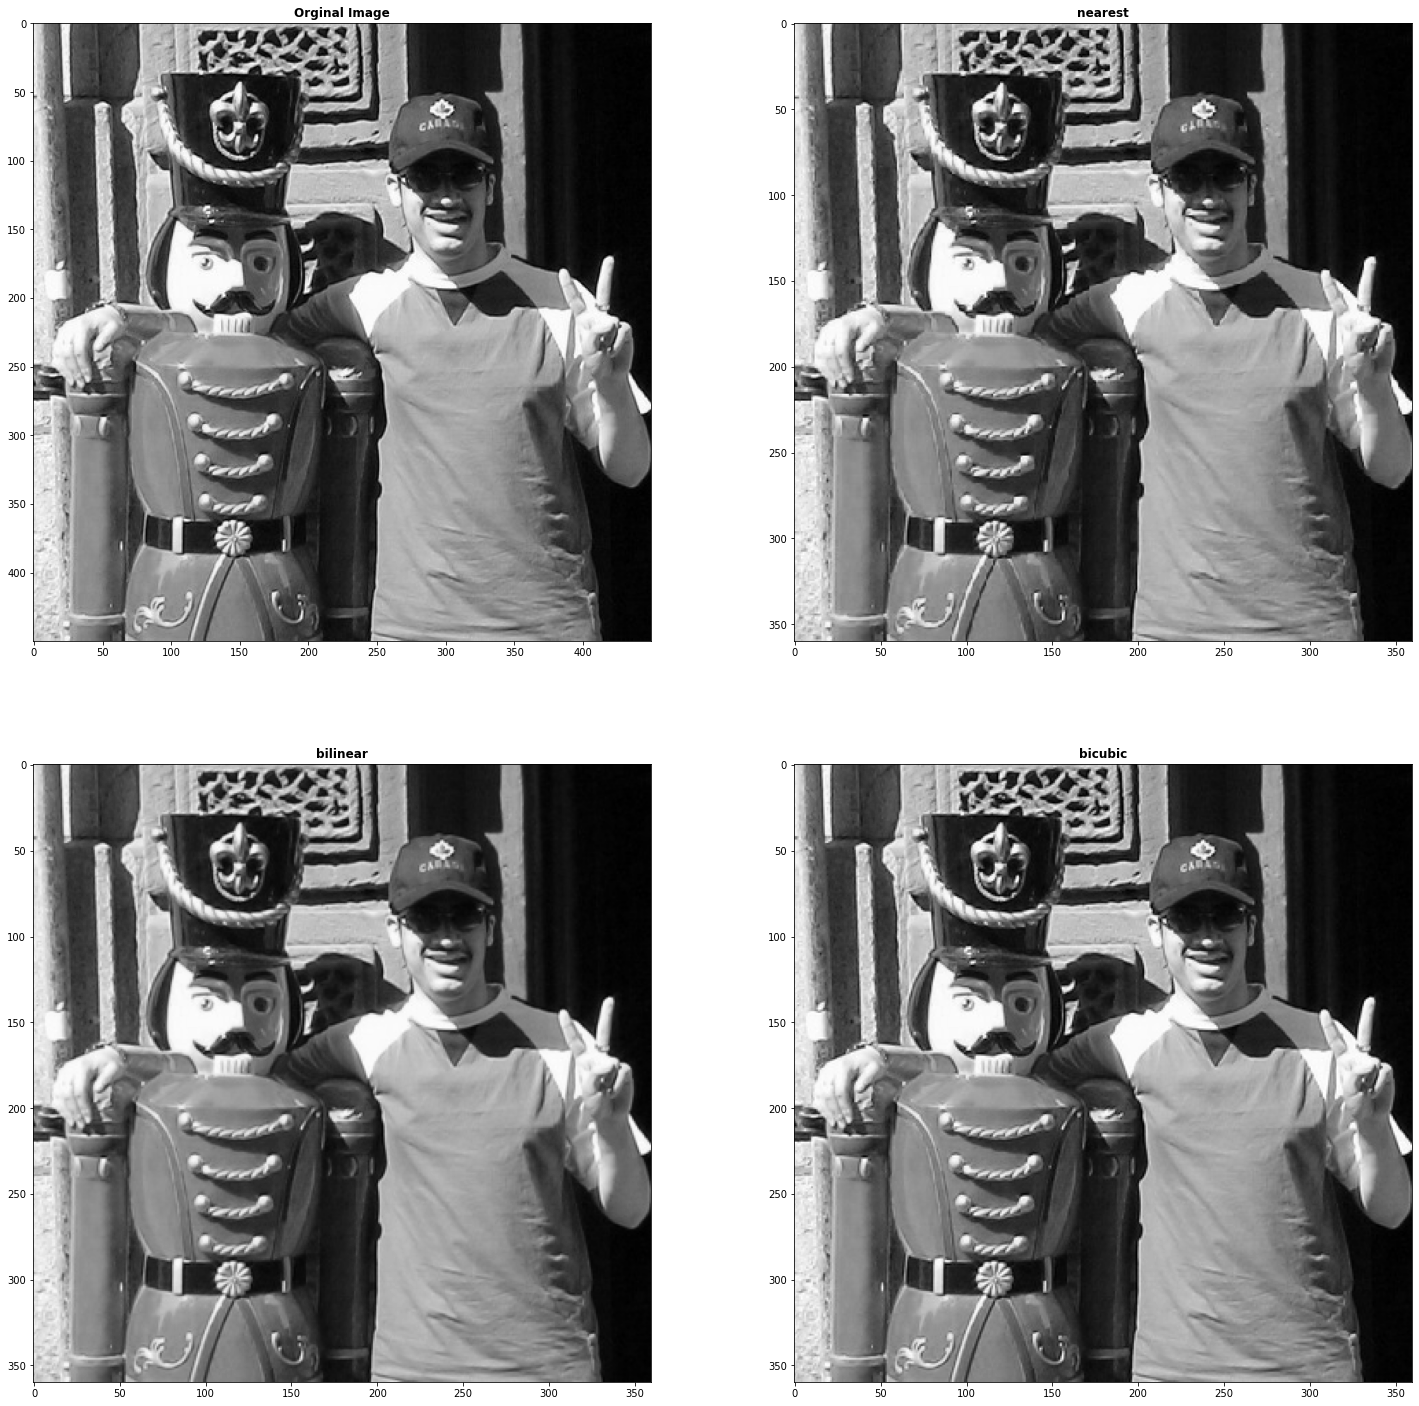

In [11]:
plt.figure(figsize=(25,25))

ShowImage(Input_image, 'Orginal Image', 221)

height = int(Input_image.shape[0] * 0.8)
width  = int(Input_image.shape[1] * 0.8)
dim = (width, height)

nearest = imresize(Input_image, dim, cv2.INTER_NEAREST)
ShowImage( nearest, 'nearest' , 222)

bilinear = imresize(Input_image, dim, cv2.INTER_LINEAR )
ShowImage( bilinear, 'bilinear', 223)

bicubic = imresize(Input_image, dim, cv2.INTER_CUBIC  )
ShowImage( bicubic, 'bicubic' , 224)

print(f"nearest MSE  = {HW1_MSE(Input_image, imresize(nearest, Input_image.shape, cv2.INTER_NEAREST))}")
print(f"bilinear MSE = {HW1_MSE(Input_image, imresize(bilinear, Input_image.shape, cv2.INTER_LINEAR))}")
print(f"bicubic MSE  = {HW1_MSE(Input_image, imresize(bicubic, Input_image.shape, cv2.INTER_CUBIC))}")

plt.show()